In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sumo as sm
import os
from traffic_initialization import *
import sys
from bs4 import BeautifulSoup
import tqdm

In [14]:
# initial xml encoding
minGap=4
N=500

filedir = './xml_data/test1/'

netfile = 'test1.net.xml'
routefile = 'test1.rou.xml'
configfile = 'test1.sumocfg'
outpufile = 'test1.statistic.output.xml'

rtFl = RouteFile(filedir + routefile)

vtype = 'id0'

rtFl.setVehicleType(vtype, {
'accel' : "3.0",
'decel' : "6.0",
'length' : "4.0",
'minGap' : str(minGap),
'maxSpeed' : "50.0",
'sigma' : "0"
})

rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=13.89)
rtFl.save()

generateConfigFile(
filedir + configfile, 
netfile,
routefile,
output=['statistic']#, 'tripinfo']
)

loadConfig(filedir +'test1.sumocfg')
# xml reading
f_name = filedir + outpufile
with open(f_name, 'r') as file:
    data = file.read()
data = BeautifulSoup(data, "xml")
# average output flow is equal to N/T, where T – full model time
#ans = float(data('vehicleTripStatistics')[0]['duration'])
ans = N/float(data('performance')[0]['duration'])
print(ans)

Step #858.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               
0.5827505827505828


In [130]:
def loss(minGap, road, N, stat='mean'):

    # initial xml encoding

    filedir = './xml_data/test1/'

    netfile = 'test1.net.xml'
    routefile = 'test1.rou.xml'
    configfile = 'test1.sumocfg'
    outpufile = 'test1.statistic.output.xml'

    rtFl = RouteFile(filedir + routefile)

    vtype = 'id0'

    rtFl.setVehicleType(vtype, {
    'accel' : "3.0",
    'decel' : "6.0",
    'length' : "4.0",
    'minGap' : str(minGap),
    'maxSpeed' : "50.0",
    'sigma' : "0"
    })

    rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=30)
    rtFl.save()
    
    if stat == 'mean':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['statistic']#, 'tripinfo']
        )

        loadConfig(filedir +'test1.sumocfg')
        # xml reading
        f_name = filedir + outpufile
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        # average output flow is equal to N/T, where T – full model time
        #ans = float(data('vehicleTripStatistics')[0]['duration'])
        ans = N/float(data('performance')[0]['duration'])

        return ans
    
    elif stat == 'median':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )
        
        loadConfig(filedir +'test1.sumocfg')
        # xml reading
        f_name = filedir + 'test1.tripinfo.output.xml'
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        
        arr = []
        for sruct in data('tripinfo'):
            arr.append(float(sruct['arrival']))
        
        n = 5
        arr = np.array(arr)
        step = max(arr)/n
        rates = []
        for i in range(n):
            temp = arr[arr > i*step]
            temp = temp[temp <= (i+1)*step]
            rates.append(temp.size)
        return np.median(rates)
            
        
    elif stat == 'fit':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )
        
        loadConfig(filedir +'test1.sumocfg')
        # xml reading
        f_name = filedir + 'test1.tripinfo.output.xml'
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        
        arr = []
        for sruct in data('tripinfo'):
            arr.append(float(sruct['arrival']))
            
        x = np.arange(len(arr))
        A = np.vstack([x, np.ones(len(x))]).T
        ans, _ = np.linalg.lstsq(A, arr, rcond=None)[0]
        return 1/ans
        
    else:
        raise Exception('Undefined statistics!')

In [108]:
loss(3.4, '1', 1000, stat='median')

Step #1623.00 (0ms ?*RT. ?UPS, vehicles TOT 1000 ACT 0 BUF 0)                             


101.5

In [135]:
# graphs

X = np.linspace(0, 8, 500)
Y = np.zeros(X.shape[0])

for i in tqdm.tqdm(range(X.shape[0])):
    
    Y[i] = loss(X[i], '', 500, stat='fit')

  0%|                                           | 1/500 [00:00<04:41,  1.77it/s]

Step #713.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  0%|▏                                          | 2/500 [00:01<04:42,  1.76it/s]

Step #727.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  1%|▎                                          | 3/500 [00:01<04:41,  1.76it/s]

Step #721.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  1%|▎                                          | 4/500 [00:02<04:45,  1.74it/s]

Step #712.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  1%|▍                                          | 5/500 [00:02<05:05,  1.62it/s]

Step #713.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  1%|▌                                          | 6/500 [00:03<05:05,  1.62it/s]

Step #743.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  1%|▌                                          | 7/500 [00:04<05:03,  1.63it/s]

Step #712.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  2%|▋                                          | 8/500 [00:04<04:57,  1.65it/s]

Step #733.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  2%|▊                                          | 9/500 [00:05<04:53,  1.67it/s]

Step #721.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  2%|▊                                         | 10/500 [00:05<04:55,  1.66it/s]

Step #743.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  2%|▉                                         | 11/500 [00:06<04:53,  1.66it/s]

Step #730.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  2%|█                                         | 12/500 [00:07<04:51,  1.67it/s]

Step #740.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  3%|█                                         | 13/500 [00:07<04:48,  1.69it/s]

Step #732.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  3%|█▏                                        | 14/500 [00:08<04:47,  1.69it/s]

Step #728.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  3%|█▎                                        | 15/500 [00:08<04:52,  1.66it/s]

Step #736.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  3%|█▎                                        | 16/500 [00:09<04:50,  1.66it/s]

Step #729.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  3%|█▍                                        | 17/500 [00:10<04:42,  1.71it/s]

Step #735.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  4%|█▌                                        | 18/500 [00:10<04:36,  1.74it/s]

Step #724.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  4%|█▌                                        | 19/500 [00:11<04:46,  1.68it/s]

Step #724.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  4%|█▋                                        | 20/500 [00:11<04:38,  1.72it/s]

Step #740.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  4%|█▊                                        | 21/500 [00:12<04:36,  1.73it/s]

Step #740.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  4%|█▊                                        | 22/500 [00:13<04:38,  1.71it/s]

Step #750.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  5%|█▉                                        | 23/500 [00:13<04:33,  1.74it/s]

Step #721.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  5%|██                                        | 24/500 [00:14<04:30,  1.76it/s]

Step #751.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  5%|██                                        | 25/500 [00:14<04:30,  1.75it/s]

Step #744.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  5%|██▏                                       | 26/500 [00:15<05:13,  1.51it/s]

Step #742.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  5%|██▎                                       | 27/500 [00:16<05:54,  1.34it/s]

Step #730.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


  6%|██▎                                       | 28/500 [00:17<06:25,  1.22it/s]

Step #729.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  6%|██▍                                       | 29/500 [00:18<06:47,  1.16it/s]

Step #744.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  6%|██▌                                       | 30/500 [00:19<06:33,  1.20it/s]

Step #747.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  6%|██▌                                       | 31/500 [00:19<05:54,  1.32it/s]

Step #748.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  6%|██▋                                       | 32/500 [00:20<05:27,  1.43it/s]

Step #733.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  7%|██▊                                       | 33/500 [00:20<05:09,  1.51it/s]

Step #755.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  7%|██▊                                       | 34/500 [00:21<04:52,  1.59it/s]

Step #736.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


  7%|██▉                                       | 35/500 [00:22<04:46,  1.63it/s]

Step #742.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  7%|███                                       | 36/500 [00:22<04:34,  1.69it/s]

Step #743.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  7%|███                                       | 37/500 [00:23<04:28,  1.72it/s]

Step #725.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  8%|███▏                                      | 38/500 [00:23<04:23,  1.76it/s]

Step #743.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  8%|███▎                                      | 39/500 [00:24<04:20,  1.77it/s]

Step #736.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  8%|███▎                                      | 40/500 [00:24<04:15,  1.80it/s]

Step #749.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  8%|███▍                                      | 41/500 [00:25<04:13,  1.81it/s]

Step #737.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  8%|███▌                                      | 42/500 [00:25<04:12,  1.82it/s]

Step #750.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  9%|███▌                                      | 43/500 [00:26<04:12,  1.81it/s]

Step #754.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  9%|███▋                                      | 44/500 [00:27<04:31,  1.68it/s]

Step #750.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  9%|███▊                                      | 45/500 [00:28<05:20,  1.42it/s]

Step #760.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  9%|███▊                                      | 46/500 [00:29<05:59,  1.26it/s]

Step #758.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


  9%|███▉                                      | 47/500 [00:30<06:22,  1.19it/s]

Step #761.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 10%|████                                      | 48/500 [00:31<06:33,  1.15it/s]

Step #748.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 10%|████                                      | 49/500 [00:31<06:45,  1.11it/s]

Step #754.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 10%|████▏                                     | 50/500 [00:32<06:47,  1.11it/s]

Step #738.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 10%|████▎                                     | 51/500 [00:33<06:57,  1.08it/s]

Step #755.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 10%|████▎                                     | 52/500 [00:34<07:00,  1.07it/s]

Step #758.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 11%|████▍                                     | 53/500 [00:35<06:15,  1.19it/s]

Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 11%|████▌                                     | 54/500 [00:36<05:47,  1.28it/s]

Step #769.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 11%|████▌                                     | 55/500 [00:36<05:23,  1.38it/s]

Step #760.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 11%|████▋                                     | 56/500 [00:37<05:02,  1.47it/s]

Step #761.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 11%|████▊                                     | 57/500 [00:37<04:47,  1.54it/s]

Step #747.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 12%|████▊                                     | 58/500 [00:38<04:35,  1.61it/s]

Step #761.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 12%|████▉                                     | 59/500 [00:38<04:29,  1.64it/s]

Step #777.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 12%|█████                                     | 60/500 [00:39<04:24,  1.67it/s]

Step #780.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 12%|█████                                     | 61/500 [00:40<04:18,  1.70it/s]

Step #769.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 12%|█████▏                                    | 62/500 [00:40<04:14,  1.72it/s]

Step #787.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 13%|█████▎                                    | 63/500 [00:41<04:11,  1.74it/s]

Step #768.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 13%|█████▍                                    | 64/500 [00:41<04:06,  1.77it/s]

Step #752.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 13%|█████▍                                    | 65/500 [00:42<04:49,  1.50it/s]

Step #764.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 13%|█████▌                                    | 66/500 [00:43<05:31,  1.31it/s]

Step #781.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 13%|█████▋                                    | 67/500 [00:44<05:58,  1.21it/s]

Step #775.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 14%|█████▋                                    | 68/500 [00:45<06:08,  1.17it/s]

Step #759.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 14%|█████▊                                    | 69/500 [00:46<06:25,  1.12it/s]

Step #776.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 14%|█████▉                                    | 70/500 [00:47<06:24,  1.12it/s]

Step #741.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 14%|█████▉                                    | 71/500 [00:48<06:29,  1.10it/s]

Step #765.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 14%|██████                                    | 72/500 [00:49<06:36,  1.08it/s]

Step #769.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 15%|██████▏                                   | 73/500 [00:50<06:34,  1.08it/s]

Step #767.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 15%|██████▏                                   | 74/500 [00:51<06:32,  1.09it/s]

Step #754.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 15%|██████▎                                   | 75/500 [00:52<06:17,  1.13it/s]

Step #755.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 15%|██████▍                                   | 76/500 [00:52<05:37,  1.26it/s]

Step #781.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 15%|██████▍                                   | 77/500 [00:53<05:05,  1.39it/s]

Step #764.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 16%|██████▌                                   | 78/500 [00:53<04:43,  1.49it/s]

Step #770.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 16%|██████▋                                   | 79/500 [00:54<04:24,  1.59it/s]

Step #796.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 16%|██████▋                                   | 80/500 [00:54<04:10,  1.68it/s]

Step #766.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 16%|██████▊                                   | 81/500 [00:55<03:59,  1.75it/s]

Step #761.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 16%|██████▉                                   | 82/500 [00:55<03:56,  1.76it/s]

Step #780.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 17%|██████▉                                   | 83/500 [00:56<03:52,  1.80it/s]

Step #770.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 17%|███████                                   | 84/500 [00:56<03:47,  1.83it/s]

Step #775.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 17%|███████▏                                  | 85/500 [00:57<03:45,  1.84it/s]

Step #770.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 17%|███████▏                                  | 86/500 [00:58<03:58,  1.74it/s]

Step #789.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 17%|███████▎                                  | 87/500 [00:58<03:52,  1.77it/s]

Step #782.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 18%|███████▍                                  | 88/500 [00:59<03:48,  1.80it/s]

Step #781.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 18%|███████▍                                  | 89/500 [00:59<03:41,  1.85it/s]

Step #782.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 18%|███████▌                                  | 90/500 [01:00<03:35,  1.90it/s]

Step #771.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 18%|███████▋                                  | 91/500 [01:00<03:32,  1.92it/s]

Step #771.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 18%|███████▋                                  | 92/500 [01:01<03:28,  1.96it/s]

Step #770.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 19%|███████▊                                  | 93/500 [01:01<03:28,  1.96it/s]

Step #782.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 19%|███████▉                                  | 94/500 [01:02<03:56,  1.72it/s]

Step #764.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 19%|███████▉                                  | 95/500 [01:03<04:38,  1.45it/s]

Step #773.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 19%|████████                                  | 96/500 [01:04<05:09,  1.30it/s]

Step #780.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 19%|████████▏                                 | 97/500 [01:05<05:33,  1.21it/s]

Step #797.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 20%|████████▏                                 | 98/500 [01:06<05:42,  1.17it/s]

Step #791.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 20%|████████▎                                 | 99/500 [01:07<05:47,  1.15it/s]

Step #785.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 20%|████████▏                                | 100/500 [01:07<05:52,  1.13it/s]

Step #766.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 20%|████████▎                                | 101/500 [01:08<05:52,  1.13it/s]

Step #769.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 20%|████████▎                                | 102/500 [01:09<05:50,  1.13it/s]

Step #773.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 21%|████████▍                                | 103/500 [01:10<05:52,  1.13it/s]

Step #799.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 21%|████████▌                                | 104/500 [01:11<05:55,  1.11it/s]

Step #795.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 21%|████████▌                                | 105/500 [01:12<05:22,  1.22it/s]

Step #773.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 21%|████████▋                                | 106/500 [01:12<04:49,  1.36it/s]

Step #789.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 21%|████████▊                                | 107/500 [01:13<04:26,  1.47it/s]

Step #783.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 22%|████████▊                                | 108/500 [01:13<04:10,  1.56it/s]

Step #779.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 22%|████████▉                                | 109/500 [01:14<03:56,  1.65it/s]

Step #786.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 22%|█████████                                | 110/500 [01:14<03:43,  1.74it/s]

Step #763.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 22%|█████████                                | 111/500 [01:15<03:38,  1.78it/s]

Step #786.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 22%|█████████▏                               | 112/500 [01:15<03:38,  1.77it/s]

Step #782.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 23%|█████████▎                               | 113/500 [01:16<03:37,  1.78it/s]

Step #774.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 23%|█████████▎                               | 114/500 [01:17<03:33,  1.80it/s]

Step #803.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 23%|█████████▍                               | 115/500 [01:17<03:28,  1.85it/s]

Step #774.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 23%|█████████▌                               | 116/500 [01:18<03:23,  1.89it/s]

Step #766.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 23%|█████████▌                               | 117/500 [01:18<03:20,  1.91it/s]

Step #802.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 24%|█████████▋                               | 118/500 [01:19<03:20,  1.91it/s]

Step #781.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 24%|█████████▊                               | 119/500 [01:19<03:20,  1.90it/s]

Step #797.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 24%|█████████▊                               | 120/500 [01:20<03:41,  1.72it/s]

Step #777.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 24%|█████████▉                               | 121/500 [01:21<04:15,  1.48it/s]

Step #786.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 24%|██████████                               | 122/500 [01:22<04:40,  1.35it/s]

Step #772.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 25%|██████████                               | 123/500 [01:22<04:52,  1.29it/s]

Step #779.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 25%|██████████▏                              | 124/500 [01:23<05:03,  1.24it/s]

Step #771.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 25%|██████████▎                              | 125/500 [01:24<05:13,  1.20it/s]

Step #799.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 25%|██████████▎                              | 126/500 [01:25<05:16,  1.18it/s]

Step #779.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 25%|██████████▍                              | 127/500 [01:26<05:22,  1.16it/s]

Step #774.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 26%|██████████▍                              | 128/500 [01:27<05:25,  1.14it/s]

Step #788.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 26%|██████████▌                              | 129/500 [01:28<05:30,  1.12it/s]

Step #794.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 26%|██████████▋                              | 130/500 [01:29<05:27,  1.13it/s]

Step #775.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 26%|██████████▋                              | 131/500 [01:30<05:26,  1.13it/s]

Step #787.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 26%|██████████▊                              | 132/500 [01:30<05:18,  1.15it/s]

Step #785.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 27%|██████████▉                              | 133/500 [01:31<04:43,  1.29it/s]

Step #790.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 27%|██████████▉                              | 134/500 [01:32<04:16,  1.43it/s]

Step #791.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 27%|███████████                              | 135/500 [01:32<03:54,  1.56it/s]

Step #785.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 27%|███████████▏                             | 136/500 [01:33<03:43,  1.63it/s]

Step #814.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 27%|███████████▏                             | 137/500 [01:33<03:34,  1.69it/s]

Step #777.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 28%|███████████▎                             | 138/500 [01:34<03:30,  1.72it/s]

Step #805.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 28%|███████████▍                             | 139/500 [01:34<03:24,  1.76it/s]

Step #806.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 28%|███████████▍                             | 140/500 [01:35<03:19,  1.80it/s]

Step #803.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 28%|███████████▌                             | 141/500 [01:35<03:14,  1.85it/s]

Step #788.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 28%|███████████▋                             | 142/500 [01:36<03:08,  1.90it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 29%|███████████▋                             | 143/500 [01:36<03:04,  1.94it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 29%|███████████▊                             | 144/500 [01:37<03:00,  1.98it/s]

Step #776.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 29%|███████████▉                             | 145/500 [01:37<02:56,  2.01it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 29%|███████████▉                             | 146/500 [01:38<03:24,  1.73it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 29%|████████████                             | 147/500 [01:39<03:56,  1.49it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 30%|████████████▏                            | 148/500 [01:40<04:14,  1.38it/s]

Step #785.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 30%|████████████▏                            | 149/500 [01:41<04:36,  1.27it/s]

Step #808.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 30%|████████████▎                            | 150/500 [01:42<04:43,  1.23it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 30%|████████████▍                            | 151/500 [01:42<04:44,  1.23it/s]

Step #791.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 30%|████████████▍                            | 152/500 [01:43<04:51,  1.20it/s]

Step #815.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 31%|████████████▌                            | 153/500 [01:44<04:50,  1.19it/s]

Step #789.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 31%|████████████▋                            | 154/500 [01:45<04:51,  1.19it/s]

Step #796.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 31%|████████████▋                            | 155/500 [01:46<04:49,  1.19it/s]

Step #790.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 31%|████████████▊                            | 156/500 [01:46<04:39,  1.23it/s]

Step #792.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 31%|████████████▊                            | 157/500 [01:47<04:02,  1.41it/s]

Step #789.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 32%|████████████▉                            | 158/500 [01:47<03:37,  1.57it/s]

Step #784.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 32%|█████████████                            | 159/500 [01:48<03:21,  1.69it/s]

Step #815.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 32%|█████████████                            | 160/500 [01:48<03:12,  1.77it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 32%|█████████████▏                           | 161/500 [01:49<03:14,  1.74it/s]

Step #781.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 32%|█████████████▎                           | 162/500 [01:49<03:04,  1.83it/s]

Step #820.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 33%|█████████████▎                           | 163/500 [01:50<02:56,  1.91it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 33%|█████████████▍                           | 164/500 [01:50<02:49,  1.99it/s]

Step #783.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 33%|█████████████▌                           | 165/500 [01:51<02:44,  2.04it/s]

Step #802.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 33%|█████████████▌                           | 166/500 [01:51<02:43,  2.04it/s]

Step #805.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 33%|█████████████▋                           | 167/500 [01:52<02:40,  2.08it/s]

Step #779.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 34%|█████████████▊                           | 168/500 [01:52<02:38,  2.09it/s]

Step #808.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 34%|█████████████▊                           | 169/500 [01:53<02:38,  2.09it/s]

Step #805.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 34%|█████████████▉                           | 170/500 [01:53<02:40,  2.05it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 34%|██████████████                           | 171/500 [01:54<02:42,  2.03it/s]

Step #821.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 34%|██████████████                           | 172/500 [01:54<02:40,  2.04it/s]

Step #807.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 35%|██████████████▏                          | 173/500 [01:55<02:37,  2.07it/s]

Step #780.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 35%|██████████████▎                          | 174/500 [01:55<02:41,  2.02it/s]

Step #828.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 35%|██████████████▎                          | 175/500 [01:56<03:08,  1.73it/s]

Step #793.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 35%|██████████████▍                          | 176/500 [01:57<03:33,  1.52it/s]

Step #798.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 35%|██████████████▌                          | 177/500 [01:58<03:50,  1.40it/s]

Step #808.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 36%|██████████████▌                          | 178/500 [01:59<03:57,  1.36it/s]

Step #797.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 36%|██████████████▋                          | 179/500 [01:59<04:07,  1.30it/s]

Step #816.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 36%|██████████████▊                          | 180/500 [02:00<04:13,  1.26it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 36%|██████████████▊                          | 181/500 [02:01<04:16,  1.25it/s]

Step #815.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 36%|██████████████▉                          | 182/500 [02:02<04:19,  1.23it/s]

Step #827.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 37%|███████████████                          | 183/500 [02:03<04:19,  1.22it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 37%|███████████████                          | 184/500 [02:04<04:20,  1.21it/s]

Step #806.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 37%|███████████████▏                         | 185/500 [02:04<04:21,  1.21it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 37%|███████████████▎                         | 186/500 [02:05<04:18,  1.21it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 37%|███████████████▎                         | 187/500 [02:06<03:50,  1.36it/s]

Step #794.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 38%|███████████████▍                         | 188/500 [02:06<03:22,  1.54it/s]

Step #803.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 38%|███████████████▍                         | 189/500 [02:07<03:05,  1.68it/s]

Step #824.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 38%|███████████████▌                         | 190/500 [02:07<02:53,  1.79it/s]

Step #825.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 38%|███████████████▋                         | 191/500 [02:08<02:41,  1.91it/s]

Step #776.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 38%|███████████████▋                         | 192/500 [02:08<02:34,  1.99it/s]

Step #806.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 39%|███████████████▊                         | 193/500 [02:08<02:29,  2.05it/s]

Step #814.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 39%|███████████████▉                         | 194/500 [02:09<02:25,  2.10it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 39%|███████████████▉                         | 195/500 [02:09<02:25,  2.10it/s]

Step #832.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 39%|████████████████                         | 196/500 [02:10<02:23,  2.12it/s]

Step #815.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 39%|████████████████▏                        | 197/500 [02:10<02:24,  2.10it/s]

Step #829.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 40%|████████████████▏                        | 198/500 [02:11<02:22,  2.12it/s]

Step #805.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 40%|████████████████▎                        | 199/500 [02:11<02:19,  2.15it/s]

Step #799.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 40%|████████████████▍                        | 200/500 [02:12<02:21,  2.11it/s]

Step #814.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 40%|████████████████▍                        | 201/500 [02:12<02:18,  2.16it/s]

Step #807.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 40%|████████████████▌                        | 202/500 [02:13<02:36,  1.91it/s]

Step #808.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 41%|████████████████▋                        | 203/500 [02:14<03:02,  1.63it/s]

Step #818.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 41%|████████████████▋                        | 204/500 [02:14<03:20,  1.48it/s]

Step #812.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 41%|████████████████▊                        | 205/500 [02:15<03:31,  1.40it/s]

Step #823.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 41%|████████████████▉                        | 206/500 [02:16<03:40,  1.33it/s]

Step #814.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 41%|████████████████▉                        | 207/500 [02:17<03:44,  1.31it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 42%|█████████████████                        | 208/500 [02:18<03:45,  1.29it/s]

Step #817.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 42%|█████████████████▏                       | 209/500 [02:18<03:40,  1.32it/s]

Step #817.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 42%|█████████████████▏                       | 210/500 [02:19<03:14,  1.49it/s]

Step #830.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 42%|█████████████████▎                       | 211/500 [02:19<02:55,  1.65it/s]

Step #820.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 42%|█████████████████▍                       | 212/500 [02:20<02:41,  1.78it/s]

Step #830.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 43%|█████████████████▍                       | 213/500 [02:20<02:32,  1.88it/s]

Step #816.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 43%|█████████████████▌                       | 214/500 [02:21<02:24,  1.98it/s]

Step #819.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 43%|█████████████████▋                       | 215/500 [02:21<02:21,  2.02it/s]

Step #822.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 43%|█████████████████▋                       | 216/500 [02:22<02:17,  2.06it/s]

Step #827.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 43%|█████████████████▊                       | 217/500 [02:22<02:13,  2.12it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 44%|█████████████████▉                       | 218/500 [02:23<02:11,  2.14it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 44%|█████████████████▉                       | 219/500 [02:23<02:10,  2.15it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 44%|██████████████████                       | 220/500 [02:23<02:10,  2.15it/s]

Step #816.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 44%|██████████████████                       | 221/500 [02:24<02:10,  2.14it/s]

Step #831.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 44%|██████████████████▏                      | 222/500 [02:24<02:09,  2.15it/s]

Step #825.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 45%|██████████████████▎                      | 223/500 [02:25<02:06,  2.19it/s]

Step #815.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 45%|██████████████████▎                      | 224/500 [02:25<02:05,  2.19it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 45%|██████████████████▍                      | 225/500 [02:26<02:05,  2.20it/s]

Step #819.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 45%|██████████████████▌                      | 226/500 [02:26<02:04,  2.20it/s]

Step #804.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 45%|██████████████████▌                      | 227/500 [02:27<02:06,  2.16it/s]

Step #820.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 46%|██████████████████▋                      | 228/500 [02:27<02:06,  2.15it/s]

Step #819.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 46%|██████████████████▊                      | 229/500 [02:28<02:20,  1.92it/s]

Step #807.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 46%|██████████████████▊                      | 230/500 [02:29<02:42,  1.66it/s]

Step #798.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 46%|██████████████████▉                      | 231/500 [02:29<02:56,  1.52it/s]

Step #806.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 46%|███████████████████                      | 232/500 [02:30<03:06,  1.44it/s]

Step #830.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 47%|███████████████████                      | 233/500 [02:31<03:13,  1.38it/s]

Step #811.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 47%|███████████████████▏                     | 234/500 [02:32<03:19,  1.34it/s]

Step #831.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 47%|███████████████████▎                     | 235/500 [02:33<03:23,  1.30it/s]

Step #847.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 47%|███████████████████▎                     | 236/500 [02:34<03:39,  1.20it/s]

Step #831.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 47%|███████████████████▍                     | 237/500 [02:34<03:37,  1.21it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 48%|███████████████████▌                     | 238/500 [02:35<03:33,  1.23it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 48%|███████████████████▌                     | 239/500 [02:36<03:33,  1.22it/s]

Step #836.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 48%|███████████████████▋                     | 240/500 [02:37<03:15,  1.33it/s]

Step #812.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 48%|███████████████████▊                     | 241/500 [02:37<02:50,  1.52it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 48%|███████████████████▊                     | 242/500 [02:37<02:34,  1.67it/s]

Step #836.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 49%|███████████████████▉                     | 243/500 [02:38<02:21,  1.81it/s]

Step #848.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 49%|████████████████████                     | 244/500 [02:38<02:13,  1.91it/s]

Step #825.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 49%|████████████████████                     | 245/500 [02:39<02:05,  2.03it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 49%|████████████████████▏                    | 246/500 [02:39<02:00,  2.11it/s]

Step #800.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 49%|████████████████████▎                    | 247/500 [02:40<01:57,  2.16it/s]

Step #823.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 50%|████████████████████▎                    | 248/500 [02:40<02:02,  2.06it/s]

Step #827.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 50%|████████████████████▍                    | 249/500 [02:41<01:59,  2.10it/s]

Step #839.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 50%|████████████████████▌                    | 250/500 [02:41<01:57,  2.13it/s]

Step #856.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 50%|████████████████████▌                    | 251/500 [02:42<01:54,  2.18it/s]

Step #827.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 50%|████████████████████▋                    | 252/500 [02:42<01:55,  2.14it/s]

Step #831.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 51%|████████████████████▋                    | 253/500 [02:43<01:55,  2.14it/s]

Step #863.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 51%|████████████████████▊                    | 254/500 [02:43<01:55,  2.14it/s]

Step #844.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 51%|████████████████████▉                    | 255/500 [02:44<02:01,  2.02it/s]

Step #822.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 51%|████████████████████▉                    | 256/500 [02:44<02:21,  1.72it/s]

Step #841.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 51%|█████████████████████                    | 257/500 [02:45<02:34,  1.58it/s]

Step #831.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 52%|█████████████████████▏                   | 258/500 [02:46<02:48,  1.44it/s]

Step #857.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 52%|█████████████████████▏                   | 259/500 [02:47<02:55,  1.37it/s]

Step #848.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 52%|█████████████████████▎                   | 260/500 [02:48<03:01,  1.33it/s]

Step #859.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 52%|█████████████████████▍                   | 261/500 [02:48<03:03,  1.30it/s]

Step #840.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 52%|█████████████████████▍                   | 262/500 [02:49<02:38,  1.50it/s]

Step #812.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 53%|█████████████████████▌                   | 263/500 [02:49<02:21,  1.68it/s]

Step #827.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 53%|█████████████████████▋                   | 264/500 [02:50<02:08,  1.83it/s]

Step #847.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 53%|█████████████████████▋                   | 265/500 [02:50<01:59,  1.96it/s]

Step #810.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 53%|█████████████████████▊                   | 266/500 [02:50<01:54,  2.05it/s]

Step #847.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 53%|█████████████████████▉                   | 267/500 [02:51<01:49,  2.12it/s]

Step #855.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 54%|█████████████████████▉                   | 268/500 [02:51<01:47,  2.16it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 54%|██████████████████████                   | 269/500 [02:52<01:45,  2.19it/s]

Step #833.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 54%|██████████████████████▏                  | 270/500 [02:52<01:43,  2.23it/s]

Step #833.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 54%|██████████████████████▏                  | 271/500 [02:53<01:42,  2.24it/s]

Step #849.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 54%|██████████████████████▎                  | 272/500 [02:53<01:41,  2.25it/s]

Step #838.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 55%|██████████████████████▍                  | 273/500 [02:54<01:49,  2.07it/s]

Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 55%|██████████████████████▍                  | 274/500 [02:54<02:09,  1.74it/s]

Step #842.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 55%|██████████████████████▌                  | 275/500 [02:55<02:20,  1.60it/s]

Step #829.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 55%|██████████████████████▋                  | 276/500 [02:56<02:28,  1.50it/s]

Step #832.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 55%|██████████████████████▋                  | 277/500 [02:57<02:35,  1.43it/s]

Step #837.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 56%|██████████████████████▊                  | 278/500 [02:58<02:39,  1.39it/s]

Step #844.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 56%|██████████████████████▉                  | 279/500 [02:58<02:40,  1.38it/s]

Step #825.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 56%|██████████████████████▉                  | 280/500 [02:59<02:23,  1.54it/s]

Step #836.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 56%|███████████████████████                  | 281/500 [02:59<02:10,  1.68it/s]

Step #841.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 56%|███████████████████████                  | 282/500 [03:00<01:59,  1.83it/s]

Step #837.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 57%|███████████████████████▏                 | 283/500 [03:00<01:51,  1.94it/s]

Step #848.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 57%|███████████████████████▎                 | 284/500 [03:01<01:46,  2.02it/s]

Step #859.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 57%|███████████████████████▎                 | 285/500 [03:01<01:41,  2.12it/s]

Step #830.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 57%|███████████████████████▍                 | 286/500 [03:01<01:39,  2.16it/s]

Step #847.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 57%|███████████████████████▌                 | 287/500 [03:02<01:36,  2.21it/s]

Step #854.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 58%|███████████████████████▌                 | 288/500 [03:02<01:36,  2.20it/s]

Step #844.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 58%|███████████████████████▋                 | 289/500 [03:03<01:52,  1.88it/s]

Step #849.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 58%|███████████████████████▊                 | 290/500 [03:04<02:05,  1.67it/s]

Step #844.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 58%|███████████████████████▊                 | 291/500 [03:05<02:15,  1.54it/s]

Step #830.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 58%|███████████████████████▉                 | 292/500 [03:05<02:24,  1.44it/s]

Step #855.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 59%|████████████████████████                 | 293/500 [03:06<02:29,  1.38it/s]

Step #873.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 59%|████████████████████████                 | 294/500 [03:07<02:32,  1.35it/s]

Step #860.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 59%|████████████████████████▏                | 295/500 [03:08<02:25,  1.41it/s]

Step #843.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 59%|████████████████████████▎                | 296/500 [03:08<02:06,  1.61it/s]

Step #822.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 59%|████████████████████████▎                | 297/500 [03:08<01:53,  1.79it/s]

Step #832.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 60%|████████████████████████▍                | 298/500 [03:09<01:46,  1.89it/s]

Step #883.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 60%|████████████████████████▌                | 299/500 [03:09<01:40,  2.00it/s]

Step #835.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 60%|████████████████████████▌                | 300/500 [03:10<01:34,  2.11it/s]

Step #835.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 60%|████████████████████████▋                | 301/500 [03:10<01:33,  2.13it/s]

Step #863.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 60%|████████████████████████▊                | 302/500 [03:11<01:31,  2.17it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 61%|████████████████████████▊                | 303/500 [03:11<01:27,  2.25it/s]

Step #823.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 61%|████████████████████████▉                | 304/500 [03:11<01:24,  2.31it/s]

Step #830.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 61%|█████████████████████████                | 305/500 [03:12<01:25,  2.29it/s]

Step #869.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 61%|█████████████████████████                | 306/500 [03:12<01:23,  2.31it/s]

Step #853.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 61%|█████████████████████████▏               | 307/500 [03:13<01:22,  2.33it/s]

Step #853.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 62%|█████████████████████████▎               | 308/500 [03:13<01:22,  2.33it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 62%|█████████████████████████▎               | 309/500 [03:14<01:22,  2.33it/s]

Step #855.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 62%|█████████████████████████▍               | 310/500 [03:14<01:21,  2.35it/s]

Step #824.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 62%|█████████████████████████▌               | 311/500 [03:14<01:28,  2.14it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 62%|█████████████████████████▌               | 312/500 [03:15<01:25,  2.20it/s]

Step #850.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 63%|█████████████████████████▋               | 313/500 [03:15<01:23,  2.23it/s]

Step #841.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 63%|█████████████████████████▋               | 314/500 [03:16<01:25,  2.18it/s]

Step #884.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 63%|█████████████████████████▊               | 315/500 [03:16<01:25,  2.18it/s]

Step #889.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 63%|█████████████████████████▉               | 316/500 [03:17<01:38,  1.86it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 63%|█████████████████████████▉               | 317/500 [03:18<01:50,  1.66it/s]

Step #840.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 64%|██████████████████████████               | 318/500 [03:19<01:59,  1.53it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 64%|██████████████████████████▏              | 319/500 [03:19<02:04,  1.45it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 64%|██████████████████████████▏              | 320/500 [03:20<02:07,  1.41it/s]

Step #868.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 64%|██████████████████████████▎              | 321/500 [03:21<02:10,  1.38it/s]

Step #863.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 64%|██████████████████████████▍              | 322/500 [03:22<02:11,  1.35it/s]

Step #856.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 65%|██████████████████████████▍              | 323/500 [03:22<02:11,  1.35it/s]

Step #864.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 65%|██████████████████████████▌              | 324/500 [03:23<02:11,  1.33it/s]

Step #849.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 65%|██████████████████████████▋              | 325/500 [03:24<02:11,  1.33it/s]

Step #863.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 65%|██████████████████████████▋              | 326/500 [03:25<02:12,  1.32it/s]

Step #867.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 65%|██████████████████████████▊              | 327/500 [03:25<02:09,  1.34it/s]

Step #842.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 66%|██████████████████████████▉              | 328/500 [03:26<01:51,  1.54it/s]

Step #862.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 66%|██████████████████████████▉              | 329/500 [03:26<01:39,  1.72it/s]

Step #857.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 66%|███████████████████████████              | 330/500 [03:27<01:30,  1.88it/s]

Step #842.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 66%|███████████████████████████▏             | 331/500 [03:27<01:24,  2.00it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 66%|███████████████████████████▏             | 332/500 [03:27<01:19,  2.11it/s]

Step #844.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 67%|███████████████████████████▎             | 333/500 [03:28<01:15,  2.20it/s]

Step #852.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 67%|███████████████████████████▍             | 334/500 [03:28<01:12,  2.28it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 67%|███████████████████████████▍             | 335/500 [03:29<01:12,  2.28it/s]

Step #884.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 67%|███████████████████████████▌             | 336/500 [03:29<01:10,  2.33it/s]

Step #842.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 67%|███████████████████████████▋             | 337/500 [03:30<01:10,  2.32it/s]

Step #879.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 68%|███████████████████████████▋             | 338/500 [03:30<01:09,  2.33it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 68%|███████████████████████████▊             | 339/500 [03:30<01:10,  2.30it/s]

Step #862.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 68%|███████████████████████████▉             | 340/500 [03:31<01:08,  2.33it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 68%|███████████████████████████▉             | 341/500 [03:31<01:08,  2.31it/s]

Step #866.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 68%|████████████████████████████             | 342/500 [03:32<01:07,  2.32it/s]

Step #861.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 69%|████████████████████████████▏            | 343/500 [03:32<01:07,  2.31it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 69%|████████████████████████████▏            | 344/500 [03:33<01:15,  2.07it/s]

Step #877.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 69%|████████████████████████████▎            | 345/500 [03:34<01:27,  1.77it/s]

Step #859.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 69%|████████████████████████████▎            | 346/500 [03:34<01:36,  1.60it/s]

Step #868.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 69%|████████████████████████████▍            | 347/500 [03:35<01:40,  1.52it/s]

Step #876.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 70%|████████████████████████████▌            | 348/500 [03:36<01:44,  1.46it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 70%|████████████████████████████▌            | 349/500 [03:37<01:46,  1.42it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 70%|████████████████████████████▋            | 350/500 [03:37<01:46,  1.41it/s]

Step #841.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 70%|████████████████████████████▊            | 351/500 [03:38<01:47,  1.39it/s]

Step #885.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 70%|████████████████████████████▊            | 352/500 [03:39<01:48,  1.36it/s]

Step #870.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 71%|████████████████████████████▉            | 353/500 [03:40<01:48,  1.36it/s]

Step #866.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 71%|█████████████████████████████            | 354/500 [03:40<01:50,  1.32it/s]

Step #859.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 71%|█████████████████████████████            | 355/500 [03:41<01:35,  1.52it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 71%|█████████████████████████████▏           | 356/500 [03:41<01:25,  1.69it/s]

Step #890.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 71%|█████████████████████████████▎           | 357/500 [03:42<01:17,  1.85it/s]

Step #884.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 72%|█████████████████████████████▎           | 358/500 [03:42<01:11,  2.00it/s]

Step #852.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 72%|█████████████████████████████▍           | 359/500 [03:42<01:06,  2.12it/s]

Step #842.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 72%|█████████████████████████████▌           | 360/500 [03:43<01:03,  2.21it/s]

Step #837.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 72%|█████████████████████████████▌           | 361/500 [03:43<01:01,  2.27it/s]

Step #856.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 72%|█████████████████████████████▋           | 362/500 [03:44<00:59,  2.32it/s]

Step #878.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 73%|█████████████████████████████▊           | 363/500 [03:44<00:58,  2.36it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 73%|█████████████████████████████▊           | 364/500 [03:44<00:58,  2.33it/s]

Step #873.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 73%|█████████████████████████████▉           | 365/500 [03:45<00:57,  2.35it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 73%|██████████████████████████████           | 366/500 [03:45<00:57,  2.35it/s]

Step #895.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 73%|██████████████████████████████           | 367/500 [03:46<00:56,  2.36it/s]

Step #862.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 74%|██████████████████████████████▏          | 368/500 [03:46<00:55,  2.39it/s]

Step #854.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 74%|██████████████████████████████▎          | 369/500 [03:47<00:54,  2.39it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 74%|██████████████████████████████▎          | 370/500 [03:47<00:53,  2.41it/s]

Step #873.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 74%|██████████████████████████████▍          | 371/500 [03:47<00:52,  2.45it/s]

Step #860.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 74%|██████████████████████████████▌          | 372/500 [03:48<00:51,  2.48it/s]

Step #859.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 75%|██████████████████████████████▌          | 373/500 [03:48<00:53,  2.37it/s]

Step #870.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 75%|██████████████████████████████▋          | 374/500 [03:49<01:02,  2.02it/s]

Step #856.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 75%|██████████████████████████████▊          | 375/500 [03:50<01:11,  1.74it/s]

Step #877.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 75%|██████████████████████████████▊          | 376/500 [03:50<01:17,  1.60it/s]

Step #862.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 75%|██████████████████████████████▉          | 377/500 [03:51<01:20,  1.53it/s]

Step #855.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 76%|██████████████████████████████▉          | 378/500 [03:52<01:22,  1.47it/s]

Step #870.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 76%|███████████████████████████████          | 379/500 [03:53<01:24,  1.44it/s]

Step #876.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 76%|███████████████████████████████▏         | 380/500 [03:53<01:24,  1.43it/s]

Step #862.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 76%|███████████████████████████████▏         | 381/500 [03:54<01:24,  1.41it/s]

Step #885.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 76%|███████████████████████████████▎         | 382/500 [03:55<01:24,  1.40it/s]

Step #868.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 77%|███████████████████████████████▍         | 383/500 [03:55<01:24,  1.39it/s]

Step #899.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 77%|███████████████████████████████▍         | 384/500 [03:56<01:24,  1.37it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 77%|███████████████████████████████▌         | 385/500 [03:57<01:23,  1.37it/s]

Step #893.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 77%|███████████████████████████████▋         | 386/500 [03:58<01:28,  1.29it/s]

Step #879.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 77%|███████████████████████████████▋         | 387/500 [03:59<01:26,  1.31it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 78%|███████████████████████████████▊         | 388/500 [03:59<01:24,  1.33it/s]

Step #869.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 78%|███████████████████████████████▉         | 389/500 [04:00<01:22,  1.34it/s]

Step #878.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 78%|███████████████████████████████▉         | 390/500 [04:01<01:21,  1.36it/s]

Step #883.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 78%|████████████████████████████████         | 391/500 [04:02<01:20,  1.36it/s]

Step #869.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 78%|████████████████████████████████▏        | 392/500 [04:02<01:19,  1.36it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 79%|████████████████████████████████▏        | 393/500 [04:03<01:19,  1.35it/s]

Step #896.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 79%|████████████████████████████████▎        | 394/500 [04:04<01:20,  1.32it/s]

Step #897.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 79%|████████████████████████████████▍        | 395/500 [04:05<01:18,  1.33it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 79%|████████████████████████████████▍        | 396/500 [04:05<01:16,  1.35it/s]

Step #868.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 79%|████████████████████████████████▌        | 397/500 [04:06<01:15,  1.36it/s]

Step #878.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 80%|████████████████████████████████▋        | 398/500 [04:07<01:14,  1.37it/s]

Step #888.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 80%|████████████████████████████████▋        | 399/500 [04:07<01:12,  1.40it/s]

Step #846.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 80%|████████████████████████████████▊        | 400/500 [04:08<01:11,  1.40it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 80%|████████████████████████████████▉        | 401/500 [04:09<01:11,  1.39it/s]

Step #876.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 80%|████████████████████████████████▉        | 402/500 [04:10<01:11,  1.37it/s]

Step #894.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 81%|█████████████████████████████████        | 403/500 [04:10<01:10,  1.38it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 81%|█████████████████████████████████▏       | 404/500 [04:11<01:10,  1.37it/s]

Step #896.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 81%|█████████████████████████████████▏       | 405/500 [04:12<01:08,  1.38it/s]

Step #864.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 81%|█████████████████████████████████▎       | 406/500 [04:12<01:07,  1.39it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 81%|█████████████████████████████████▎       | 407/500 [04:13<01:07,  1.39it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 82%|█████████████████████████████████▍       | 408/500 [04:14<01:06,  1.38it/s]

Step #889.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 82%|█████████████████████████████████▌       | 409/500 [04:15<01:06,  1.37it/s]

Step #895.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 82%|█████████████████████████████████▌       | 410/500 [04:15<01:05,  1.37it/s]

Step #886.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 82%|█████████████████████████████████▋       | 411/500 [04:16<01:04,  1.38it/s]

Step #896.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 82%|█████████████████████████████████▊       | 412/500 [04:17<01:03,  1.38it/s]

Step #904.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 83%|█████████████████████████████████▊       | 413/500 [04:17<01:02,  1.39it/s]

Step #888.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 83%|█████████████████████████████████▉       | 414/500 [04:18<01:00,  1.41it/s]

Step #864.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 83%|██████████████████████████████████       | 415/500 [04:19<01:00,  1.39it/s]

Step #873.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 83%|██████████████████████████████████       | 416/500 [04:20<01:00,  1.39it/s]

Step #899.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 83%|██████████████████████████████████▏      | 417/500 [04:20<00:59,  1.39it/s]

Step #895.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 84%|██████████████████████████████████▎      | 418/500 [04:21<00:58,  1.40it/s]

Step #868.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 84%|██████████████████████████████████▎      | 419/500 [04:22<00:58,  1.39it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 84%|██████████████████████████████████▍      | 420/500 [04:23<00:57,  1.40it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 84%|██████████████████████████████████▌      | 421/500 [04:23<00:56,  1.39it/s]

Step #899.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 84%|██████████████████████████████████▌      | 422/500 [04:24<00:56,  1.39it/s]

Step #885.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 85%|██████████████████████████████████▋      | 423/500 [04:25<00:53,  1.43it/s]

Step #836.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 85%|██████████████████████████████████▊      | 424/500 [04:25<00:52,  1.45it/s]

Step #861.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 85%|██████████████████████████████████▊      | 425/500 [04:26<00:52,  1.44it/s]

Step #880.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 85%|██████████████████████████████████▉      | 426/500 [04:27<00:51,  1.43it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 85%|███████████████████████████████████      | 427/500 [04:27<00:52,  1.40it/s]

Step #911.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 86%|███████████████████████████████████      | 428/500 [04:28<00:51,  1.40it/s]

Step #878.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 86%|███████████████████████████████████▏     | 429/500 [04:29<00:50,  1.41it/s]

Step #897.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 86%|███████████████████████████████████▎     | 430/500 [04:30<00:48,  1.44it/s]

Step #851.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 86%|███████████████████████████████████▎     | 431/500 [04:30<00:48,  1.44it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 86%|███████████████████████████████████▍     | 432/500 [04:31<00:47,  1.44it/s]

Step #872.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 87%|███████████████████████████████████▌     | 433/500 [04:32<00:46,  1.46it/s]

Step #883.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 87%|███████████████████████████████████▌     | 434/500 [04:32<00:45,  1.44it/s]

Step #911.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 87%|███████████████████████████████████▋     | 435/500 [04:33<00:46,  1.41it/s]

Step #897.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 87%|███████████████████████████████████▊     | 436/500 [04:34<00:45,  1.39it/s]

Step #902.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 87%|███████████████████████████████████▊     | 437/500 [04:34<00:44,  1.41it/s]

Step #874.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 88%|███████████████████████████████████▉     | 438/500 [04:35<00:44,  1.39it/s]

Step #906.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 88%|███████████████████████████████████▉     | 439/500 [04:36<00:43,  1.40it/s]

Step #902.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 88%|████████████████████████████████████     | 440/500 [04:37<00:43,  1.39it/s]

Step #912.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 88%|████████████████████████████████████▏    | 441/500 [04:37<00:41,  1.42it/s]

Step #866.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 88%|████████████████████████████████████▏    | 442/500 [04:38<00:40,  1.42it/s]

Step #877.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 89%|████████████████████████████████████▎    | 443/500 [04:39<00:40,  1.40it/s]

Step #914.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 89%|████████████████████████████████████▍    | 444/500 [04:39<00:39,  1.40it/s]

Step #899.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 89%|████████████████████████████████████▍    | 445/500 [04:40<00:40,  1.37it/s]

Step #864.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 89%|████████████████████████████████████▌    | 446/500 [04:41<00:38,  1.39it/s]

Step #891.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 89%|████████████████████████████████████▋    | 447/500 [04:42<00:38,  1.39it/s]

Step #915.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 90%|████████████████████████████████████▋    | 448/500 [04:42<00:37,  1.40it/s]

Step #893.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 90%|████████████████████████████████████▊    | 449/500 [04:43<00:36,  1.40it/s]

Step #875.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 90%|████████████████████████████████████▉    | 450/500 [04:44<00:35,  1.41it/s]

Step #885.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 90%|████████████████████████████████████▉    | 451/500 [04:44<00:34,  1.41it/s]

Step #902.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 90%|█████████████████████████████████████    | 452/500 [04:45<00:33,  1.41it/s]

Step #912.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 91%|█████████████████████████████████████▏   | 453/500 [04:46<00:33,  1.42it/s]

Step #889.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 91%|█████████████████████████████████████▏   | 454/500 [04:47<00:32,  1.41it/s]

Step #910.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 91%|█████████████████████████████████████▎   | 455/500 [04:47<00:31,  1.42it/s]

Step #889.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 91%|█████████████████████████████████████▍   | 456/500 [04:48<00:30,  1.42it/s]

Step #894.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 91%|█████████████████████████████████████▍   | 457/500 [04:49<00:30,  1.39it/s]

Step #911.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 92%|█████████████████████████████████████▌   | 458/500 [04:50<00:31,  1.32it/s]

Step #880.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 92%|█████████████████████████████████████▋   | 459/500 [04:50<00:30,  1.34it/s]

Step #909.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 92%|█████████████████████████████████████▋   | 460/500 [04:51<00:29,  1.37it/s]

Step #906.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 92%|█████████████████████████████████████▊   | 461/500 [04:52<00:28,  1.38it/s]

Step #931.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 92%|█████████████████████████████████████▉   | 462/500 [04:52<00:27,  1.37it/s]

Step #891.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 93%|█████████████████████████████████████▉   | 463/500 [04:53<00:26,  1.38it/s]

Step #900.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 93%|██████████████████████████████████████   | 464/500 [04:54<00:25,  1.39it/s]

Step #883.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 93%|██████████████████████████████████████▏  | 465/500 [04:55<00:25,  1.40it/s]

Step #881.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 93%|██████████████████████████████████████▏  | 466/500 [04:55<00:24,  1.41it/s]

Step #891.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 93%|██████████████████████████████████████▎  | 467/500 [04:56<00:23,  1.40it/s]

Step #905.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 94%|██████████████████████████████████████▍  | 468/500 [04:57<00:23,  1.38it/s]

Step #921.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 94%|██████████████████████████████████████▍  | 469/500 [04:57<00:22,  1.39it/s]

Step #893.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 94%|██████████████████████████████████████▌  | 470/500 [04:58<00:21,  1.39it/s]

Step #930.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 94%|██████████████████████████████████████▌  | 471/500 [04:59<00:20,  1.42it/s]

Step #879.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 94%|██████████████████████████████████████▋  | 472/500 [05:00<00:19,  1.43it/s]

Step #888.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 95%|██████████████████████████████████████▊  | 473/500 [05:00<00:18,  1.44it/s]

Step #892.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 95%|██████████████████████████████████████▊  | 474/500 [05:01<00:17,  1.47it/s]

Step #855.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 95%|██████████████████████████████████████▉  | 475/500 [05:02<00:17,  1.45it/s]

Step #908.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 95%|███████████████████████████████████████  | 476/500 [05:02<00:16,  1.44it/s]

Step #909.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 500 ACT 0 BUF 0)                  


 95%|███████████████████████████████████████  | 477/500 [05:03<00:16,  1.42it/s]

Step #929.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 96%|███████████████████████████████████████▏ | 478/500 [05:04<00:15,  1.39it/s]

Step #939.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 96%|███████████████████████████████████████▎ | 479/500 [05:04<00:14,  1.40it/s]

Step #905.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 96%|███████████████████████████████████████▎ | 480/500 [05:05<00:14,  1.41it/s]

Step #884.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 96%|███████████████████████████████████████▍ | 481/500 [05:06<00:13,  1.40it/s]

Step #924.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 96%|███████████████████████████████████████▌ | 482/500 [05:07<00:12,  1.40it/s]

Step #911.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 97%|███████████████████████████████████████▌ | 483/500 [05:07<00:12,  1.40it/s]

Step #913.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 97%|███████████████████████████████████████▋ | 484/500 [05:08<00:11,  1.40it/s]

Step #920.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 97%|███████████████████████████████████████▊ | 485/500 [05:09<00:10,  1.40it/s]

Step #900.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 97%|███████████████████████████████████████▊ | 486/500 [05:09<00:09,  1.42it/s]

Step #883.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 97%|███████████████████████████████████████▉ | 487/500 [05:10<00:09,  1.43it/s]

Step #915.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 98%|████████████████████████████████████████ | 488/500 [05:11<00:08,  1.43it/s]

Step #912.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 98%|████████████████████████████████████████ | 489/500 [05:12<00:07,  1.42it/s]

Step #929.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 98%|████████████████████████████████████████▏| 490/500 [05:12<00:07,  1.42it/s]

Step #913.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 98%|████████████████████████████████████████▎| 491/500 [05:13<00:06,  1.43it/s]

Step #918.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 98%|████████████████████████████████████████▎| 492/500 [05:14<00:05,  1.44it/s]

Step #902.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 99%|████████████████████████████████████████▍| 493/500 [05:14<00:04,  1.43it/s]

Step #924.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 99%|████████████████████████████████████████▌| 494/500 [05:15<00:04,  1.41it/s]

Step #896.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 99%|████████████████████████████████████████▌| 495/500 [05:16<00:03,  1.39it/s]

Step #920.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 99%|████████████████████████████████████████▋| 496/500 [05:16<00:02,  1.41it/s]

Step #894.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


 99%|████████████████████████████████████████▊| 497/500 [05:17<00:02,  1.41it/s]

Step #907.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


100%|████████████████████████████████████████▊| 498/500 [05:18<00:01,  1.41it/s]

Step #948.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


100%|████████████████████████████████████████▉| 499/500 [05:19<00:00,  1.43it/s]

Step #867.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


100%|█████████████████████████████████████████| 500/500 [05:19<00:00,  1.56it/s]

Step #894.00 (0ms ?*RT. ?UPS, vehicles TOT 500 ACT 0 BUF 0)                               


In [136]:
np.savez('res_data/' + 'test1_8', X=X, Y=Y, N = 500, speed=30, maxspeed=50)

Text(0, 0.5, 'throughput')

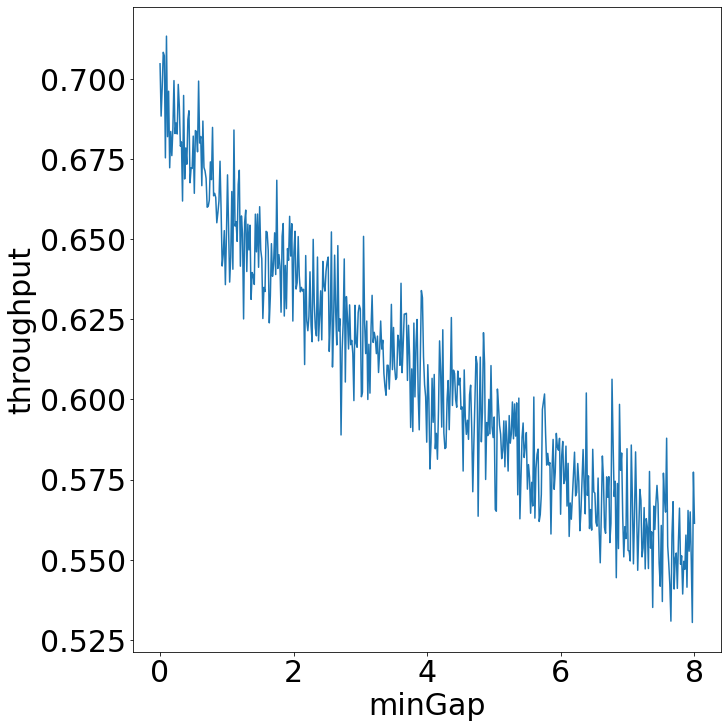

In [138]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


Text(0, 0.5, 'throughput')

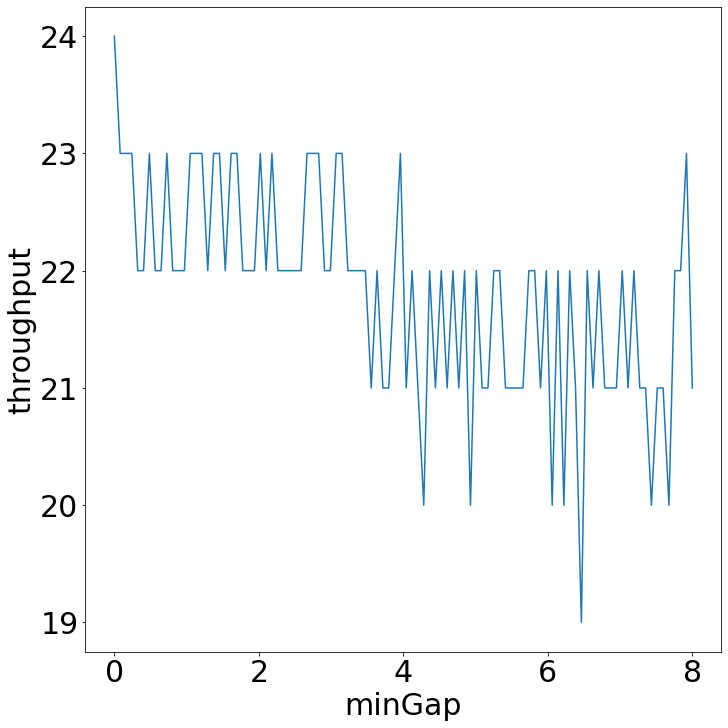

In [133]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


In [ ]:
# simple optimization

bounds = (, )

sol = sc.optimize.dual_annealing(loss, bounds=[bounds], args=['road', inflow], maxiter=200)
ans = sol.x

In [ ]:
# smart ml optimization?